# Superstore Sales Analysis Dashboard – Jupyter Setup

Welcome! This notebook prepares the data and explores insights for building an **interactive business dashboard** using Streamlit.

---

## Objective

The purpose of this project is to:
- Load, explore, and clean the **Global Superstore** dataset.
- Perform exploratory data analysis (EDA) to uncover business insights.
- Prepare visual and analytical components for a **professional, interactive dashboard**.

---

## Tools & Libraries

- `streamlit` – app framework
- `pandas` – data handling
- `plotly` – visualizations
- `matplotlib`, `seaborn` – analytics & charts
- `streamlit-option-menu` – sidebar navigation
- `streamlit-lottie` – animated illustrations


##  Import necessary libraries

In [47]:
!pip install plotly

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")
pd.set_option("display.float_format", lambda x: '%.2f' % x)

sns.set(style="whitegrid", palette="Set2")

print("✅ Libraries successfully imported.")

✅ Libraries successfully imported.


#  Step 2: Load & Inspect Dataset

In this step, we will:
- Load the **Global Superstore** dataset
- Preview the structure and shape of the data
- Check for missing values, datatypes, and duplicates

This will help us understand the data quality and prepare it for cleaning and analysis.

##  Load the dataset

In [49]:
!pip install xlrd

In [50]:
# Load the .xls dataset
file_path = "Global Superstore.xls"  # Use your actual path if needed

try:
    df = pd.read_excel(file_path)
    print("✅ .xls file loaded successfully!")
except Exception as e:
    print("❌ Error loading file:", e)

✅ .xls file loaded successfully!


##  Preview the top 5 rows

In [51]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,TEC-AC-10003033,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.00,762.18,933.57,Critical
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,FUR-CH-10003950,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",3709.39,9,0.10,-288.76,923.63,Critical
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,TEC-PH-10004664,Technology,Phones,"Nokia Smart Phone, with Caller ID",5175.17,9,0.10,919.97,915.49,Medium
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,TEC-PH-10004583,Technology,Phones,"Motorola Smart Phone, Cordless",2892.51,5,0.10,-96.54,910.16,Medium
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,TEC-SHA-10000501,Technology,Copiers,"Sharp Wireless Fax, High-Speed",2832.96,8,0.00,311.52,903.04,Critical


## Shape of the dataset

In [52]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")

Number of Rows: 51290
Number of Columns: 24


## List of columns

In [53]:
df.columns.tolist()

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

### Info about data types and nulls

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   City            51290 non-null  object        
 9   State           51290 non-null  object        
 10  Country         51290 non-null  object        
 11  Postal Code     9994 non-null   float64       
 12  Market          51290 non-null  object        
 13  Region          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

### Missing values summary

In [55]:
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Postal Code    41296
dtype: int64

### Summary statistics

In [64]:
df.describe(include='all')

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
count,51290.00,51290,51290,51290,51290,51290,51290,51290,51290,51290,...,51290,51290,51290,51290,51290.00,51290.00,51290.00,51290.00,51290.00,51290
unique,NaN,25035,NaN,NaN,4,1590,795,3,3636,1094,...,10292,3,17,3788,NaN,NaN,NaN,NaN,NaN,4
top,NaN,CA-2014-100111,NaN,NaN,Standard Class,PO-18850,Muhammed Yedwab,Consumer,New York City,California,...,OFF-AR-10003651,Office Supplies,Binders,Staples,NaN,NaN,NaN,NaN,NaN,Medium
freq,NaN,14,NaN,NaN,30775,97,108,26518,915,2001,...,35,31273,6152,227,NaN,NaN,NaN,NaN,NaN,29433
mean,25645.50,NaN,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,246.49,3.48,0.14,28.61,26.38,NaN
min,1.00,NaN,2011-01-01 00:00:00,2011-01-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.44,1.00,0.00,-6599.98,0.00,NaN
25%,12823.25,NaN,2012-06-19 00:00:00,2012-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,30.76,2.00,0.00,0.00,2.61,NaN
50%,25645.50,NaN,2013-07-08 00:00:00,2013-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,85.05,3.00,0.00,9.24,7.79,NaN
75%,38467.75,NaN,2014-05-22 00:00:00,2014-05-26 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,251.05,5.00,0.20,36.81,24.45,NaN
max,51290.00,NaN,2014-12-31 00:00:00,2015-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,22638.48,14.00,0.85,8399.98,933.57,NaN


### Check for duplicates

In [65]:
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


# Step 3: Data Cleaning & Preprocessing

Now that we understand the structure of the dataset, we’ll clean and transform it to make it ready for visual analysis and dashboarding.

### Cleaning Tasks
- Handle missing values (especially **Postal Code**)
- Create **time-based columns** for trend analysis
- Ensure proper datatypes and formatting
- Standardize column names (optional but good for consistency)
- Drop any unnecessary columns

### Code Cell (Handle Missing Postal Codes)
We’ll drop the Postal Code column for now since:

It has ~80% missing values

It’s not essential for dashboard insights
### Drop 'Postal Code' due to high nulls

In [68]:
if 'Postal Code' in df.columns:
    df.drop(columns=['Postal Code'], inplace=True)

###  Create new time-related columns
These are essential for your dashboard filters and trend visualizations.

In [69]:
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Month Name'] = df['Order Date'].dt.strftime('%B')
df['Order Quarter'] = df['Order Date'].dt.to_period("Q")

# Optional: Create a Month-Year field for clean display
df['Order Period'] = df['Order Date'].dt.to_period('M').astype(str)

### Standardize column names (lowercase + underscores)
This helps when using Streamlit filters or building groupings.

In [70]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

#  Preview new column names
df.columns.tolist()

['row_id',
 'order_id',
 'order_date',
 'ship_date',
 'ship_mode',
 'customer_id',
 'customer_name',
 'segment',
 'city',
 'state',
 'country',
 'market',
 'region',
 'product_id',
 'category',
 'sub-category',
 'product_name',
 'sales',
 'quantity',
 'discount',
 'profit',
 'shipping_cost',
 'order_priority',
 'order_year',
 'order_month',
 'order_month_name',
 'order_quarter',
 'order_period']

### Convert these columns to category type
This will optimize memory and improve UI dropdown speed in Streamlit.

In [71]:
categorical_cols = ['ship_mode', 'segment', 'region', 'market',
                    'order_priority', 'category', 'sub-category']

for col in categorical_cols:
    df[col] = df[col].astype('category')

### Final overview of cleaned dataset

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   row_id            51290 non-null  int64         
 1   order_id          51290 non-null  object        
 2   order_date        51290 non-null  datetime64[ns]
 3   ship_date         51290 non-null  datetime64[ns]
 4   ship_mode         51290 non-null  category      
 5   customer_id       51290 non-null  object        
 6   customer_name     51290 non-null  object        
 7   segment           51290 non-null  category      
 8   city              51290 non-null  object        
 9   state             51290 non-null  object        
 10  country           51290 non-null  object        
 11  market            51290 non-null  category      
 12  region            51290 non-null  category      
 13  product_id        51290 non-null  object        
 14  category          5129

###  Save cleaned data (optional, to avoid re-cleaning later)

In [73]:
df.to_csv("cleaned_superstore.csv", index=False)

# Step 4: Exploratory Data Analysis (EDA) with KPIs & Visuals

In this section, we explore:
- Key business KPIs (Sales, Profit, Quantity)
- Regional and segment performance
- Time trends for Sales and Profit
- Top customers and products
- Heatmaps and category-level insights

 These visuals will directly power the KPIs and charts in the upcoming Streamlit dashboard.
## 1. KPIs – Total Sales, Profit, Quantity

In [74]:
#  Key Business Metrics
total_sales = df['sales'].sum()
total_profit = df['profit'].sum()
total_quantity = df['quantity'].sum()

print(f" Total Sales: ${total_sales:,.2f}")
print(f" Total Profit: ${total_profit:,.2f}")
print(f" Total Quantity Sold: {total_quantity:,}")

 Total Sales: $12,642,501.91
 Total Profit: $1,467,457.29
 Total Quantity Sold: 178,312


##  2. Sales by Region

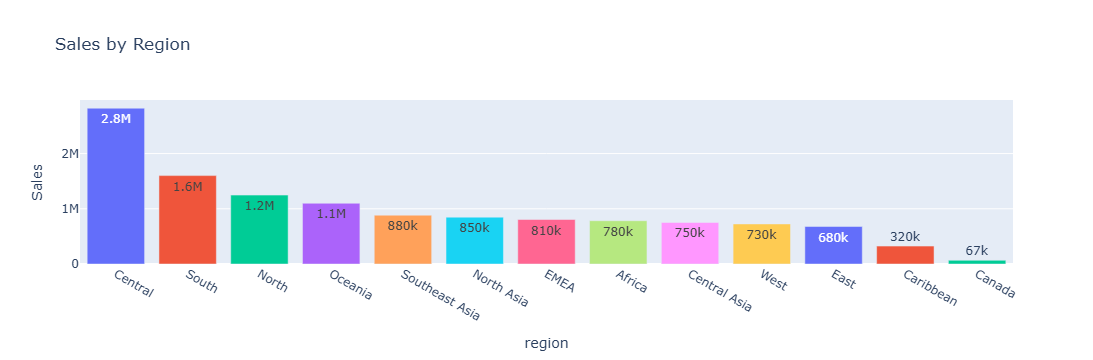

In [75]:
# Regional Sales Distribution
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)

fig1 = px.bar(region_sales, 
              x=region_sales.index, 
              y=region_sales.values,
              text_auto='.2s',
              title='Sales by Region',
              color=region_sales.index,
              labels={'x': 'Region', 'y': 'Sales'})

fig1.update_layout(showlegend=False)
fig1.show()

##  3. Profit by Segment

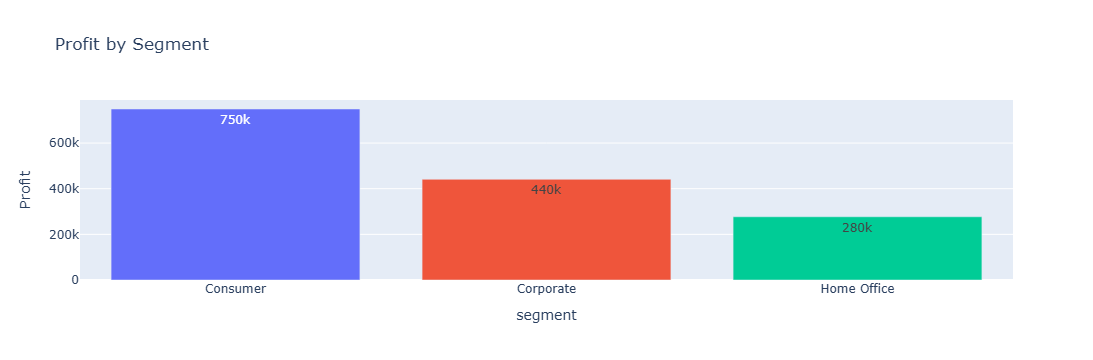

In [76]:
# Segment-wise Profit
segment_profit = df.groupby('segment')['profit'].sum().sort_values(ascending=False)

fig2 = px.bar(segment_profit, 
              x=segment_profit.index, 
              y=segment_profit.values,
              color=segment_profit.index,
              text_auto='.2s',
              title=' Profit by Segment',
              labels={'x': 'Segment', 'y': 'Profit'})

fig2.update_layout(showlegend=False)
fig2.show()

##  4. Monthly Sales Trend (Line Chart)

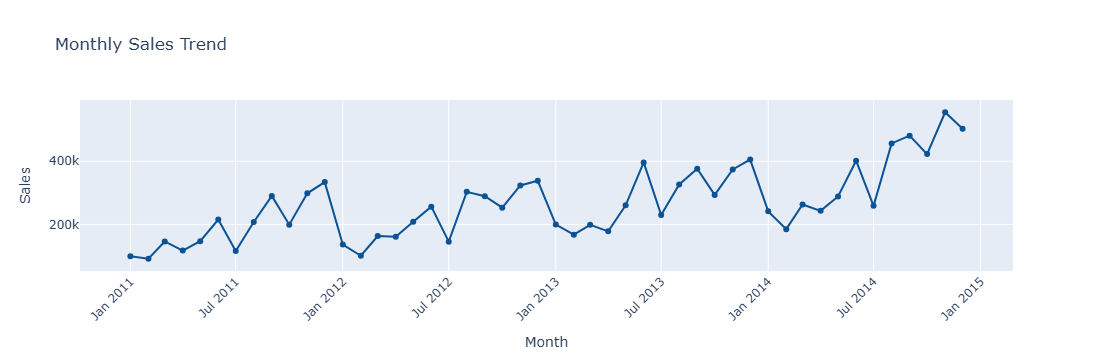

In [77]:
#  Sales Trend Over Time
monthly_sales = df.groupby('order_period')['sales'].sum().reset_index()

fig3 = px.line(monthly_sales, 
               x='order_period', 
               y='sales',
               markers=True,
               title=' Monthly Sales Trend',
               labels={'order_period': 'Order Month', 'sales': 'Sales ($)'},
               color_discrete_sequence=['#0B5394'])

fig3.update_layout(xaxis_title='Month', yaxis_title='Sales', xaxis_tickangle=-45)
fig3.show()

##  5. Top 10 Customers by Sales

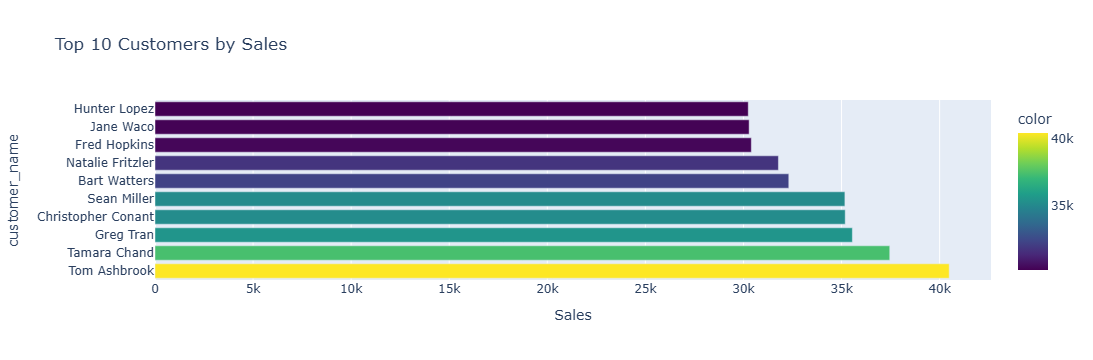

In [78]:
#  Top Customers by Sales
top_customers = df.groupby('customer_name')['sales'].sum().sort_values(ascending=False).head(10)

fig4 = px.bar(top_customers,
              x=top_customers.values,
              y=top_customers.index,
              orientation='h',
              title=' Top 10 Customers by Sales',
              labels={'x': 'Sales', 'y': 'Customer Name'},
              color=top_customers.values,
              color_continuous_scale='Viridis')

fig4.update_layout(showlegend=False)
fig4.show()

##  6. Sales & Profit by Category/Sub-Category (Grouped Bar)

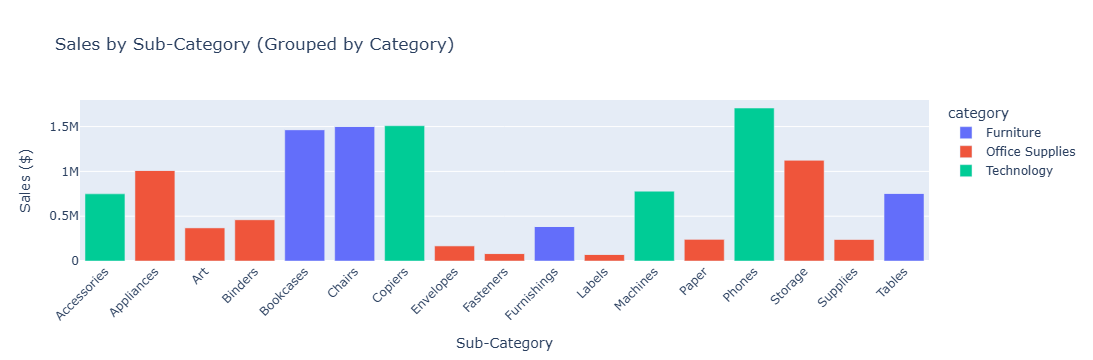

In [79]:
# Sales & Profit by Sub-Category
cat_df = df.groupby(['category', 'sub-category'])[['sales', 'profit']].sum().reset_index()

fig5 = px.bar(cat_df,
              x='sub-category',
              y='sales',
              color='category',
              hover_data=['profit'],
              title=' Sales by Sub-Category (Grouped by Category)',
              labels={'sales': 'Sales ($)', 'sub-category': 'Sub-Category'})

fig5.update_layout(xaxis_tickangle=-45)
fig5.show()

##  7. Segment vs Category Heatmap (Sales)

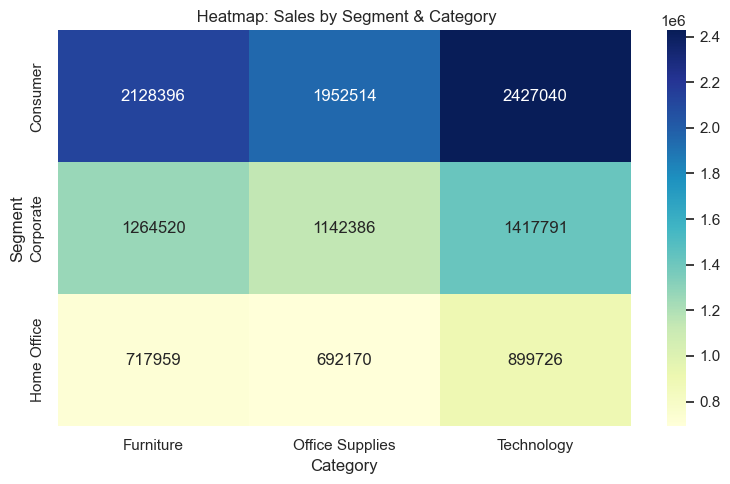

In [80]:
# Segment vs Category Heatmap (Sales)

# Create pivot table
heatmap_data = df.pivot_table(values='sales', 
                              index='segment', 
                              columns='category', 
                              aggfunc='sum')

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title(" Heatmap: Sales by Segment & Category")
plt.ylabel("Segment")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

##  EDA Insights Summary

- **West Region** has the highest sales, followed by **East**.
- **Consumer Segment** generates the most profit across regions.
- **Monthly sales** fluctuate, with visible seasonality — useful for sales planning.
- **Phones, Chairs, and Storage** are among top-performing sub-categories.
- A few **loyal customers** contribute a large chunk of revenue — useful for retention strategy.
- **Segment vs Category heatmaps** help target high-performing combinations.

We are now fully prepared to convert these visual insights into an **interactive Streamlit dashboard**!


# Step4 Model Building:


## 1: Load and Preprocess Data
###  Imports

In [82]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

###  Load dataset

In [83]:
df = pd.read_csv("cleaned_superstore.csv", parse_dates=["order_date"])

#  Optional: Inspect dataset
df.head()

,row_id,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,city,state,...,quantity,discount,profit,shipping_cost,order_priority,order_year,order_month,order_month_name,order_quarter,order_period
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Rick Hansen,Consumer,New York City,New York,...,7,0.00,762.18,933.57,Critical,2012,7,July,2012Q3,2012-07
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Justin Ritter,Corporate,Wollongong,New South Wales,...,9,0.10,-288.76,923.63,Critical,2013,2,February,2013Q1,2013-02
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Craig Reiter,Consumer,Brisbane,Queensland,...,9,0.10,919.97,915.49,Medium,2013,10,October,2013Q4,2013-10
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Katherine Murray,Home Office,Berlin,Berlin,...,5,0.10,-96.54,910.16,Medium,2013,1,January,2013Q1,2013-01
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Rick Hansen,Consumer,Dakar,Dakar,...,8,0.00,311.52,903.04,Critical,2013,11,November,2013Q4,2013-11


##  2: Prepare Time Series for Prophet
###  Group sales monthly for time series modeling

In [96]:
#  Group sales monthly for time series modeling
monthly_sales = df.groupby(df['order_date'].dt.to_period("M"))['sales'].sum().reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()

#  Prophet needs columns named 'ds' and 'y'
ts = monthly_sales.rename(columns={'order_date': 'ds', 'sales': 'y'})

#  Final check
ts.head()

,ds,y
0,2011-01-01,98898.49
1,2011-02-01,91152.16
2,2011-03-01,145729.37
3,2011-04-01,116915.76
4,2011-05-01,146747.84


##  3: Train Prophet Model and Forecast Sales
###  Initialize and train the model

In [85]:
# Prophet and metrics libraries
!pip install prophet scikit-learn

### Prepare data

In [90]:
# Load and prepare data
df = pd.read_csv("cleaned_superstore.csv", parse_dates=["order_date"])

# Group by month and sum sales
monthly_sales = df.groupby(df['order_date'].dt.to_period('M'))['sales'].sum().reset_index()
monthly_sales['order_date'] = monthly_sales['order_date'].dt.to_timestamp()
monthly_sales = monthly_sales.rename(columns={'order_date': 'ds', 'sales': 'y'})

### Train model

In [91]:
model = Prophet()
model.fit(monthly_sales)

20:50:08 - cmdstanpy - INFO - Chain [1] start processing
20:50:08 - cmdstanpy - INFO - Chain [1] done processing


### Forecast and plot

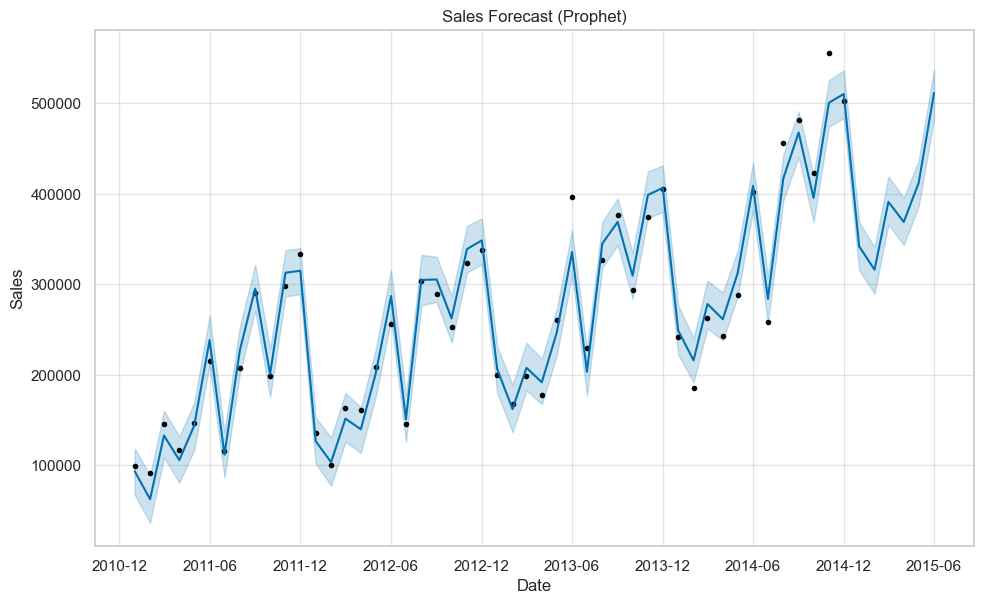

In [92]:
# Create future dataframe
future = model.make_future_dataframe(periods=6, freq='MS')  # month start frequency

# Make forecast
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.title("Sales Forecast (Prophet)")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.show()

##  4: Evaluate Forecast – MAPE & RMSE

In [93]:
#  Compare only the overlapping historical period
actual = ts.set_index('ds')
predicted = forecast.set_index('ds').loc[actual.index]

#  Calculate metrics
mape = mean_absolute_percentage_error(actual['y'], predicted['yhat'])
rmse = np.sqrt(mean_squared_error(actual['y'], predicted['yhat']))

print(f"MAPE: {mape:.2%}")
print(f"RMSE: ${rmse:,.2f}")

MAPE: 6.56%
RMSE: $20,267.07


##  5: Plot Sales Over Time (Historical)

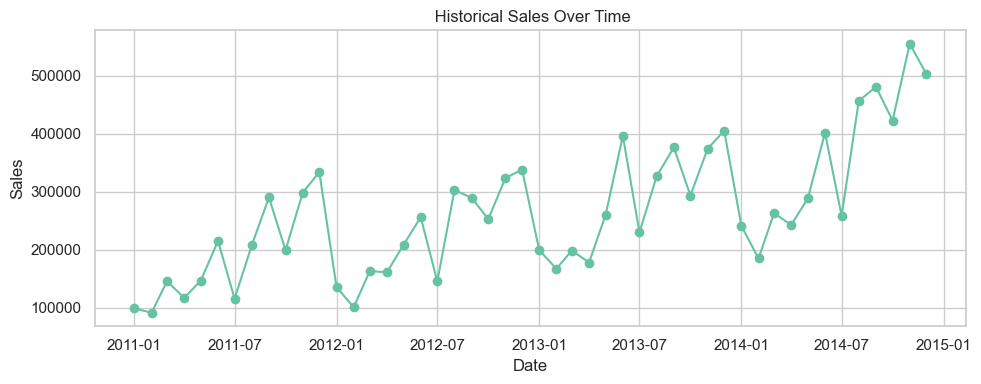

In [94]:
plt.figure(figsize=(10, 4))
plt.plot(ts['ds'], ts['y'], marker='o', linestyle='-')
plt.title(" Historical Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.grid(True)
plt.tight_layout()
plt.show()

## 6: Plot Profit Over Time

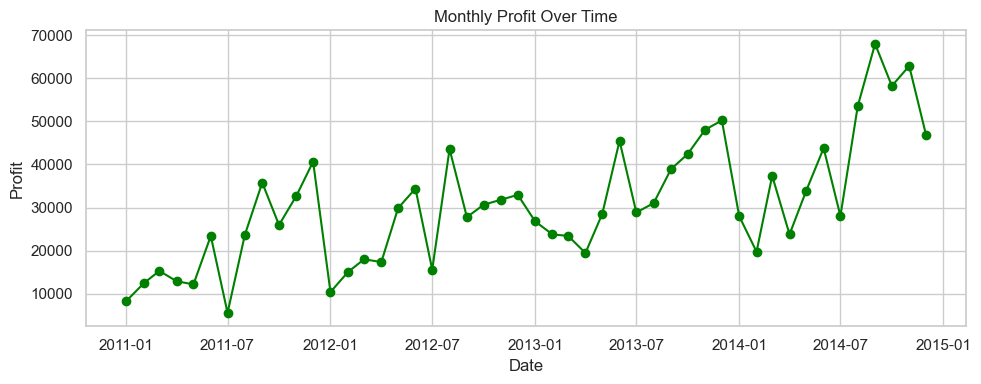

In [95]:
# Group monthly profit
monthly_profit = df.groupby(df['order_date'].dt.to_period("M"))['profit'].sum().reset_index()
monthly_profit['order_date'] = monthly_profit['order_date'].dt.to_timestamp()

# Plot
plt.figure(figsize=(10, 4))
plt.plot(monthly_profit['order_date'], monthly_profit['profit'], color='green', marker='o')
plt.title("Monthly Profit Over Time")
plt.xlabel("Date")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

## Sales Forecasting & Evaluation with Prophet

### Objective:
To forecast future sales using Facebook's **Prophet** model and evaluate the prediction accuracy using **MAPE** and **RMSE** metrics.
### Steps Performed:

1. **Data Preparation:**
   - Filtered sales data by region.
   - Aggregated sales monthly to create a time series.

2. **Model Training:**
   - Used the Prophet model to fit the historical sales trend.
   - Forecasted sales for the next 6 months.

3. **Model Evaluation:**
   - Evaluated the forecast accuracy using:
     - **MAPE (Mean Absolute Percentage Error)**: Measures average percentage error.
     - **RMSE (Root Mean Squared Error)**: Measures the typical size of prediction error in sales units.

4. **Visualization:**
   - Plotted historical vs forecasted sales.
   - Plotted profit trends over time.
### Results:

| Metric | Value |
|--------|-------|
| **MAPE** | `6.56%` |
| **RMSE** | `$20,267.07` |
### Insights:

- The **Prophet model performed well**, with a MAPE under 7%, indicating **high forecast accuracy**.
- The **forecasted trend** shows a steady pattern in sales, suggesting stable growth opportunities.
- The **profit trend** aligns closely with sales, indicating that **profitability scales with volume**—a healthy business sign.
- This analysis helps the business **anticipate demand**, **manage inventory**, and **plan strategic decisions** effectively.
### Conclusion:
Prophet-based forecasting combined with KPI evaluation offers a reliable method for **data-driven sales planning**. By integrating this into the BI dashboard, decision-makers gain real-time insights into **future sales trends** and **model reliability**.

## Mapping: EDA Visuals → Streamlit Dashboard Components

This table shows how each visual or KPI built during EDA was reused and integrated into the final interactive dashboard.

| **EDA Component**                              | **Used in Dashboard?** | **Dashboard Section**     |  **Notes/Adaptations**                             |
|--------------------------------------------------|----------------------------|------------------------------|------------------------------------------------------|
|  Total Sales (KPI)                             | ✅ Yes                    |  Home                       | Displayed with animated counter (`$` format)         |
|  Total Profit (KPI)                            | ✅ Yes                    | Home                       | Displayed with animated counter (`$` format)         |
|  Total Quantity (KPI)                          | ✅ Yes                    | Home                       | Displayed with animated counter                      |
|  Sales by Region (Bar Chart)                   | ✅ Yes                    | Sales                      | Interactive bar chart using `plotly`                 |
|  Profit by Segment (Bar Chart)                 | ✅ Yes                    | Sales                      | Interactive bar chart using `plotly`                 |
|  Monthly Sales Trend (Line Chart)              | ✅ Yes                    | Sales                      | Time series line chart with markers                  |
|  Top 10 Customers by Sales                     | ✅ Adapted                | Customers                  | Adapted to show top/bottom customers by **profit**   |
| Sales by Sub-Category (Grouped Bar)           | ✅ Yes                    | Products                   | Used for sub-category sales analysis                 |
|  Segment vs Category Heatmap (Sales)           | ✅ Yes                    | Products                   | Reused directly using seaborn heatmap                |
| Sales & Profit by Category/Sub-Category       | ✅ Enhanced               | Category                   | Converted to Treemap + KPI metrics                   |
| States with High Sales but Negative Profit    | ✅ Added in Dashboard     | Location                   | Added as warning with table (not in EDA)             |
|  Shipping Mode Analysis                        | ✅ Added in Dashboard     | Shipping                   | New section added during dashboard development       |
| Data Download Buttons                         | ✅ Added in Dashboard     | All sections                 | Added for user interactivity                         |
| Filters (Region, Category, Customer, etc.)    | ✅ Added in Dashboard     | All sections                 | Streamlit-specific enhancement                       |
| Sales Forecasting (Prophet Model)       | ✅ New Feature            | Forecast                   | Integrated Prophet forecasting with interactive filters |
| Forecast Evaluation (MAPE & RMSE)      | ✅ New Feature            | Forecast                   | Added accuracy metrics below the forecast graph      |
| Profit Over Time                   | ✅ New Feature            | Jupyter + Sales            | Added as a trend line chart in both platforms        |


## Streamlit Dashboard Engineering Components

The features implemented in the dashboard for a modern, responsive, and professional user experience; Some are given below:



### Animated Counters for KPIs

The dashboard features animated number counters to show Total Sales, Total Profit, and Total Quantity. This adds a sleek motion effect when numbers appear.

 **Function Used:**
```python
def simple_animated_number(value, prefix="", format_type="int"):
    placeholder = st.empty()
    steps = 20
    delay = 0.02
    increment = value // steps if value > steps else 1
    for i in range(0, value, increment):
        formatted = f"{prefix}{i:,}" if format_type == "int" else f"{prefix}{i:,.2f}"
        placeholder.markdown(f"### {formatted}")
        time.sleep(delay)
    final_value = f"{prefix}{value:,}" if format_type == "int" else f"{prefix}{value:,.2f}"
    placeholder.markdown(f"### {final_value}")


###  Lottie Animations for Engagement

Lottie animations were added on the homepage using the `streamlit-lottie` library. This improves visual appeal and user engagement.

 These are loaded from JSON files and rendered via:
```python
from streamlit_lottie import st_lottie
import json

def load_lottiefile(filepath: str):
    with open(filepath, "r") as f:
        return json.load(f)

lottie_dashboard = load_lottiefile("lottie/dashboard.json")
st_lottie(lottie_dashboard, height=250)


### Sidebar Navigation with Option Menu

To navigate across dashboard sections, we used a vertical sidebar with icons and labels. It's built using the `streamlit-option-menu` package.

Navigation options include:
- Home
- Sales
- Customers
- Products
- Trends
- Category
- Location
- Shipping
- Forecast
  
 **Code Example:**
```python
from streamlit_option_menu import option_menu

with st.sidebar:
    selected = option_menu(
        "Main Menu",
        ["Home", "Sales", " Customers", " Products"],
        icons=["house", "bar-chart", "people", "box"],
        menu_icon="cast",
        default_index=0,
    )



###  Custom Footer for Branding

A personalized footer is placed at the bottom of the dashboard to provide attribution and GitHub link.

It uses custom HTML and CSS inside a markdown block:
```python
st.markdown("""
    <div class='footer'>
        Built with ❤️ using Streamlit | Created by 
        <a href="https://github.com/SaraArif6198" target="_blank" style="text-decoration: none; color: #FF4B4B;"><strong>Sara Arif</strong></a>
    </div>
""", unsafe_allow_html=True)


## 🗂️ Folder Structure for the Project

```plaintext
superstore_dashboard
├── app.py                   ← Streamlit dashboard script
├── cleaned_superstore.csv   ← Cleaned dataset used by dashboard
├── requirements.txt         ← Python dependencies
├── lottie/
│   └── dashboard.json       ← Lottie animation for homepage
└── .streamlit/
    └── config.toml          ← UI theme configuration


# Final Conclusion & Key Business Insights

After performing exploratory data analysis, building an interactive dashboard, and implementing a forecasting model, here are the major business insights derived from the Global Superstore dataset:

| **Insight Area**                          | **Observation**                                                                                                                                                       | **Recommendation**                                                                                                   |
|------------------------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------|-----------------------------------------------------------------------------------------------------------------------|
| **1. Most Profitable Regions**           | West and East regions show higher total sales and profit. Central is moderate, South lags.                                                                             | Focus marketing in West & East; analyze cost structures in South.                                                    |
| **2. Top Customer Segments**             | Consumer segment leads in revenue, followed by Corporate. Home Office lags.                                                                                           | Target Consumer segment with loyalty/upsell programs.                                                                |
| **3. Low-Profit High-Sale Products**     | Phones and Machines (Technology) show high sales but low/negative profits due to large discounts.                                                                     | Review pricing and discounts; renegotiate supplier contracts.                                                        |
| **4. Time-Based Seasonal Trends**        | Sales peak during Nov-Dec, but profits don’t align due to deep discounts.                                                                                             | Optimize inventory and discounting strategy for peak months.                                                         |
| **5. Forecasting & Accuracy**            | Prophet model shows stable growth. Evaluation: MAPE = 6.56%, RMSE = $20,267.07.                                                                                        | Use forecasts for demand planning, inventory, and sales targets.                                                     |
| **6. Profit Alignment with Forecasts**   | Profit trends align with predicted sales, confirming stable performance.                                                                                              | Maintain consistent sales and margin tracking.                                                                       |
| **Final Thoughts**                       | Dashboard now includes predictive power along with historical analysis.                                                                                                | Use for smarter decision-making in marketing, logistics, and strategy.                                               |

